# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Описание проекта

### Цель исследования

Оценка влияния семейного положения и количества детей у клиента на факт погашения кредита в срок, для дальнейшего использования, полученных данных, при построении модели кредитного скоринга.

### Источник данных

Статистика о платёжеспособности клиентов полученная от банка.

**Описание данных:**

`children` - количество детей в семье;

`days_employed` - общий трудовой стаж в днях;

`dob_years` - возраст клиента в годах;

`education` - уровень образования клиента;

`education_id` - идентификатор уровня образования;

`family_status` - семейное положение;

`family_status_id` - идентификатор семейного положения;

`gender` - пол клиента;

`income_type` - тип занятости;

`debt` - имел ли задолженность по возврату кредитов;

`total_income` - ежемесячный доход;

`purpose` - цель получения кредита.

### Ход выполнения

1. Получение общей информации о данных.
2. Предобработка данных:
- обработка пропусков;
- обработка аномальных значений;
- замена типов данных;
- удаление дубликатов;
- лемматизация столбца с целями кредита;
- категоризация данных.
3. Ответ на поставленные вопросы:
- Есть ли зависимость между количеством детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?

## Получение общей информации о данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from pymystem3 import Mystem #получение лемматизатора для слов на русском языке
m = Mystem()

df = pd.read_csv('/datasets/data.csv')
df.info() #получение общей информации о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**ОБЩИЕ СВЕДЕНИЯ О ДАННЫХ**
- Датафрейм включает в себя 12 столбцов и содержит 21525 записей.
- Названия столбцов записаны корректно и отражают суть, содержащихся в них данных.
- В датафрейме одинаковое количество пропущенных значений в столбцах 'days_employed' и 'total_income'.

In [2]:
df.head(10) #вывод первых десяти строчек датафрейма

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**ПРОБЛЕМЫ С ДАННЫМИ**


 Из 10 первых строчек датафрейма видно:

- отрицательные значения и слишком большие значения в столбце 'days_employed';
- в столбце 'education' одинаковые значения записаны буквами в разных регистрах; <a id='problem'></a>
- в столбцах 'days_employed' и 'total_income', значения содержат большое количество знаков после запятой.

**Вывод**


В каждой строке представленного датафрейма записаны данные о заемщиках, которые включают в себя количество детей, дляительность трудового стажа в днях, возраст, уровень образования, семейный статус, пол, тип занятости и ежемесячный доход. Также данные содержат информацию о цели кредита и наличии задолженности по возврату кредита.

Представленных данных достаточно для ответа на вопросы заказчика, но в данных есть пропуски и другие проблемы требующие  предобработки.



<div style="border:solid Green 2px; padding: 10px"> 
<font style="color:Green; font-size:100%";> ✔️ Комментарий ревьюера:</font> Файл прочитан верно. Использованы методы info() и head() для осмотра датафрейма и оценки пропусков и проведена дополнительная оценка значений в некоторых столбцах. Отлично, что все это отражено в выводах.

</div>

## Предобработка данных

### Обработка пропусков

При изучении общей информации о датафрейме было выяснено, что одинаковое количество пропущенных значений встречается в двух столбцах - 'days_employed' и 'total_income'.


In [3]:
df[df['total_income'].isna()] #вывод строк датафрейма с пропущенными значениями

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


Мы убедились в том, что в одних и тех же строках пропущены значения в столбцах 'days_employed' и 'total_income'.

In [4]:
df[df['total_income'].isna()]['days_employed'].isna().sum()

2174

Для дальнейшего анализа нам не понадобятся данные из столбца 'days_employed', следовательно данный столбец может быть удалён.

In [5]:
df_changed = df.drop(['days_employed'], axis=1)
df_changed.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Обработку пропусков в столбце 'total_income' начнем с изучения значений в столбце.

In [7]:
df['total_income'].describe().apply("{0:.3f}".format)

count      19351.000
mean      167422.302
std       102971.566
min        20667.264
25%       103053.153
50%       145017.938
75%       203435.068
max      2265604.029
Name: total_income, dtype: object

В столбце наблюдается большой разброс значений, поэтому в качестве значения для замены пропусков правильней использовать медиану. Однако, нужно учесть что уровень дохода может разниться в зависимости от типа занятости.

Найдем медианы ежемесячного дохода в группах с различным уровнем занятости.

In [8]:
total_income_medians = df_changed.groupby('income_type')['total_income'].median().sort_values(ascending=False)
total_income_medians

income_type
предприниматель    499163.144947
компаньон          172357.950966
госслужащий        150447.935283
сотрудник          142594.396847
безработный        131339.751676
пенсионер          118514.486412
студент             98201.625314
в декрете           53829.130729
Name: total_income, dtype: float64

Медиана ежемесячного дохода различается в зависимости от типа занятости (самая высокая у предпринимателей, самая низкая у тех кто в декрете). 

Заменим пропуски на медианы ежемесячного дохода для каждого типа занятости.

In [10]:
for income_type in df_changed['income_type'].unique():
    df_changed.loc[df_changed['income_type'] == income_type, 
                   'total_income'] = df_changed.loc[df_changed['income_type'] == income_type, 
                                                    'total_income'].fillna(total_income_medians[income_type])
df_changed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   dob_years         21525 non-null  int64  
 2   education         21525 non-null  object 
 3   education_id      21525 non-null  int64  
 4   family_status     21525 non-null  object 
 5   family_status_id  21525 non-null  int64  
 6   gender            21525 non-null  object 
 7   income_type       21525 non-null  object 
 8   debt              21525 non-null  int64  
 9   total_income      21525 non-null  float64
 10  purpose           21525 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 1.8+ MB


**Вывод**

В процессе замены пропущенных значений мы определили, что пропущенные значения находятся в одних и тех же строках в столбцах 'days_employed' и 'total_income'.
 
Возможно, значения в этих столбцах связаны между собой, например, если при вводе данных о заемщике по какой-то причине не были введены данные о трудовом стаже ("человеческий фактор"), автоматически проставлялся пропуск в столбце с данными о ежемесячном доходе ("кто не работает, тот не ест").

Информация о трудовом стаже не нужна для ответа на поставленные вопросы, поэтому столбец 'days_employed' был удален из датафрейма, тем самым немного уменьшили объем памяти занимаемой датафреймом.

Пропущенные значения в столбце 'total_income' было решено заменить медианой ежемесячного дохода, т.к. значения в данном столбце изменяются в весьма широком диапазоне, и выскакивающие значения могут искажать среднюю величину. Учитывая, что медианы ежемесячного дохода различаются в зависимости от типа занятости, пропущенные значения были заменены медианами для каждой группы по типу занятости.

### Замена типа данных

In [11]:
df_changed['total_income'] = df_changed['total_income'].astype(int) #замена вещественного типа данных на целочисленный 
df_changed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   dob_years         21525 non-null  int64 
 2   education         21525 non-null  object
 3   education_id      21525 non-null  int64 
 4   family_status     21525 non-null  object
 5   family_status_id  21525 non-null  int64 
 6   gender            21525 non-null  object
 7   income_type       21525 non-null  object
 8   debt              21525 non-null  int64 
 9   total_income      21525 non-null  int64 
 10  purpose           21525 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.8+ MB


**Вывод**

Столбец 'total_income' содержал в себе вещественные числа с большим количеством знаков после точки, что могло создать проблемы при дальнейшей работе с данными.

Замена вещественного типа данных на целочисленный была произведена с помощью функции astype(), т.к. она позволяет произвести замену в одну строку.

### Обработка дубликатов

In [12]:
df_changed.duplicated().sum() #находим количество дубликатов в датафрейме

54

В датафрейме 54 дубликата, но это только явные дубликаты, т.е. строки в которых значения полностью совпадают во всех столбцах.

Но уже при получении общей информации о данных мы выяснили, что в столбце 'education' одни и теже значения [записаны буквами разного регистра](#problem), а значит Pyton определяет их как разные значения.

Чтобы превести все значения в столбце 'education' к одному регистру используем метод str.lower().

In [13]:
df_changed['education'] = df_changed['education'].str.lower()
df_changed.duplicated().sum()

71

После выполненной операции количество дубликатов увеличилось до 71, теперь удалим их используя метод drop_duplicates().

In [14]:
df_changed = df_changed.drop_duplicates().reset_index(drop=True)
df_changed.duplicated().sum()

0

Кстати, стоит посмотреть количество дубликатов в исходном датафрейме. Возможно, если оставить столбец 'days_employed', дубликатов будет меньше

In [15]:
df.duplicated().sum()

54

Количество дубликатов такое же, а значит столбец 'days_employed' не добавит нам уникальных значений.

Проверим нет ли проблем со столбцами 'family_status', 'gender' и 'purpose'. 

In [16]:
df_changed['family_status'].value_counts()

женат / замужем          12339
гражданский брак          4151
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

Здесь все в порядке.

In [17]:
df_changed['gender'].value_counts()

F      14174
M       7279
XNA        1
Name: gender, dtype: int64

Здесь тоже все в порядке.

Возможны несколько вариантов:
- это банальная ошибка при формировании записи;
- мы живем в эпоху, когда система гендерной идентичности перестала быть бинарной, а значит это может быть действительно какой-то третий пол (хотя в банковских записях, да ещё и в нашей стране, это едва ли возможно);
- возможно клиент менял пол и на момент обращения его половая принадлежность юридически имела некий переходный статус;
- в банк обратился гражданин иностраного государства, а у них в паспорте графа пол отсутствует и т.д.
    
В любом случае половая принадлежность - не та информация, которая необходима нам для ответа на поставленные вопросы, поэтому считаю, что запись можно не трогать, ну или в крайнем случае удалить. </div>

In [18]:
df_changed['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

Здесь проблема иного характера: одинаковые по смыслу значения, записаны по разному. С этим поможет разобраться лемматизация.

**Вывод**

В датафрейме был обнаружен 71 дубликат.

Для поиска дубликатов мы сначали применили метод str.lower() к столбцу 'education', т.к. ещё на этапе знакомства с данными обнаружили в нем одинаковые значения записанные буквами в разных регистрах. Далее удалили дубликаты, применив метод drop_duplicates(), и сбросили индексы без сохранения старых методом reset_index().

Альтернативное решение (не уверен в его правильности): удалить столбец 'education', т.к. у нас есть столбец 'education_id'(предварительно сохранить расшифровку числовой кодировки в словаре), далее применить к датафрейму метод drop_duplicates().

**Возможные причины появления дубликатов:**
- повторный ввод данных об одном и том же заемщике (особенно если программа для сбора данных не защищена от этого, т.е. при попытке сохранения данных о заеме, который уже есть в базе, не выскакивает предупреждение);
- запись одних и тех же данных разными способами, как в случае со столбцом 'education';
- дублирование в результате ошибки при выгрузке данных;
- в датафрейме теоретически могут встретится несколько записей о заемщиках, которые действительно обладают полностью идентичными данными. 

### Лемматизация

In [19]:
df_changed['lemmas'] = df_changed['purpose'].apply(m.lemmatize) #примение функции lemmatize() к каждому значению в столбце 'purpose', 
                                                #с применением метода apply()
#Результатам работы коды будет объект Series, который мы сохранили в переменную lemmas
df_changed['lemmas'].value_counts() #подсчет уникальных значений в полученном Series
lem = df_changed['lemmas'].sum()
Counter(lem) #подсчет количества полученных лемм

Counter({'покупка': 5897,
         ' ': 33570,
         'жилье': 4460,
         '\n': 21454,
         'приобретение': 461,
         'автомобиль': 4306,
         'дополнительный': 906,
         'образование': 4013,
         'сыграть': 765,
         'свадьба': 2324,
         'операция': 2604,
         'с': 2918,
         'на': 2222,
         'проведение': 768,
         'для': 1289,
         'семья': 638,
         'недвижимость': 6351,
         'коммерческий': 1311,
         'жилой': 1230,
         'строительство': 1878,
         'собственный': 635,
         'подержать': 478,
         'свой': 2230,
         'со': 627,
         'заниматься': 904,
         'сделка': 941,
         'подержанный': 486,
         'получение': 1314,
         'высокий': 1374,
         'профильный': 436,
         'сдача': 651,
         'ремонт': 607})

**Вывод**

Мы выполнили лемматизацию значений в столбце 'purpose', что в дальнейшем поможет категоризировать данные по этому признаку. 

Даже при беглом осмотре результатов лемматизации видно, что основными целями кредита являются различные операции с недвижимостью, включая ремонт жилья, приобретение автомобиля, получение образования и свадьба.

### Категоризация данных

Чтобы дать ответы на все поставленные вопросы необходимо необходимо категоризировать данные по следкющим параметрам:
- количеству детей;
- семейному положению;
- уровню дохода;
- целям кредита.

Категоризацию данных по количеству детей начнем с изчучения значений в соответствующем столбце

In [20]:
df_changed['children'].value_counts()

 0     14091
 1      4808
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Среди данных в столбце есть два явно аномаольных значения - -1 и 20. Несмотря на то что в отдельных семьях может быть 20 и более детей, в данном датафрейме их количество явно аномально (76). Можно предположить, что эти аномалии связаны с ошибкой при вводе данных, таких значений относительно мало, поэтому можно от них избавиться.  

In [21]:
df_changed = df_changed.query('children != -1 and children != 20') #получение среза датафрейма по заданным условиям
df_changed['children'].value_counts() #проверка

0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

На территории России многодетными считаются семьи в которых воспитываются 3 и более детей. Исходя из этого выделим три категории заемщиков:
- без детей
- 1-2 ребенка
- многодетные

In [23]:
def children_group (row): #функция дял категоризации по количеству детей
    children = row['children']
    if children == 0:
        return 'без детей'
    if 0 < children < 3:
        return '1-2 ребенка'
    return 'многодетные'

df_changed['children_group'] = df_changed.apply(children_group, axis=1) #применение функции к каждой строке и сохранение
#результатов её работы в новый столбец
df_changed[['children', 'children_group']].head() #проверка
df_changed['children_group'].value_counts()

без детей      14091
1-2 ребенка     6860
многодетные      380
Name: children_group, dtype: int64

Далее категоризируем данные по семейному положению.

In [24]:
print(df_changed['family_status'].value_counts()) #количество уникальных значений в столбцу 'family_status'
df_changed['family_status_id'].value_counts() #количество уникальных значений в столбце 'family_status_id', теперь мы занем какой
#id соответвствует каждому статусу


женат / замужем          12261
гражданский брак          4134
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
Name: family_status, dtype: int64


0    12261
1     4134
4     2796
3     1189
2      951
Name: family_status_id, dtype: int64

Всех заемщиков по семейному статусу можно разделить на две группы:
- на момент взятия кредита состоят в официальном или гражданском браке (обозначим как 'состоит в браке')
- на момент взятия кредита не стостоят в официальном или гражданском браке (обозначим как 'не состоит в браке')

Однако, считаю что для ответа на поставленный вопрос (Есть ли зависимость между семейным положением и возвратом кредита в срок?)  целесообразно, так же провести анализ по каждому семейному статусу, т.к. указанные изначально в датафрейме семейные статусы могут влиять на финансовое состояние заемщика. Например:
- заемщики из группы 'женат/замужем' ведут совместное хозяйство с супругой/супругом и официально имеют перед друг другом определенные финансовые обязательства;
- заемщики живущие в гражданском браке, также ведут совместное хозяйство с партнером, но при этом, как правило, не обременены какими-то финансовыми обязательствами перед друг другом;
- заемщики находящиеся в разводе имеют дополнительное финансовое обременение в виде алиментов;
- заемщики со статусом 'вдова/вдовец' единолично содержат детей и т.д.

In [25]:
def family_status_group(row): #функция для категоризации по семейному статусу
    family_status_id = row['family_status_id']
    if 0 <= family_status_id < 2:
        return 'состоит в браке'
    return 'не состоит в браке'

df_changed['family_status_group'] = df_changed.apply(family_status_group, axis=1)#применение функции к каждой строке и сохранение
#результатов её работы в новый столбец
df_changed[['family_status', 'family_status_group']].head() #проверка

,family_status,family_status_group
0,женат / замужем,состоит в браке
1,женат / замужем,состоит в браке
2,женат / замужем,состоит в браке
3,женат / замужем,состоит в браке
4,гражданский брак,состоит в браке


Для ориентира при категоризации заемщиков по уровню дохода спользуем медиану данного показателя. Разделим заемщиков на 4 группы:
- с ежемесячным доход 1/2 медианы и ниже (низкий доход)
- с ежемесячным доходом от более, чем 1/2 медианы до медианы (средний доход)
- с ежемясячным доходом от более, чем 1 медианы до 2 медиан (высокий доход)
- с ежемесячным доходом более 2 медиан (сверхвысокий доход)

In [26]:
def total_income_group(row): #функция для категоризации по уровню дохода
    income = row['total_income']
    income_median = df_changed['total_income'].median()
    if income <= income_median / 2:
        return 'низкий доход'
    elif income_median / 2 < income <= income_median:
        return 'средний доход'
    elif income_median < income <= income_median * 2:
        return 'высокий доход'
    else:
        return 'сверхвысокий доход'

df_changed['total_income_group'] = df_changed.apply(total_income_group, axis=1) #применение функции к каждой строке и сохранение
#результатов её работы в новый столбец
display(df_changed[['total_income', 'total_income_group']].head()) #проверка
df_changed['total_income_group'].value_counts()

,total_income,total_income_group
0,253875,высокий доход
1,112080,средний доход
2,145885,высокий доход
3,267628,высокий доход
4,158616,высокий доход


средний доход         9214
высокий доход         8802
сверхвысокий доход    1746
низкий доход          1569
Name: total_income_group, dtype: int64

После лемматизации мы выделели 4 цели кредита по котором будет проводится категоризация:
- операции с недвижимостью
- приобретение автомобиля
- образование
- свадьба

In [27]:
def purpose_group(row): #функция для категоризации по целям кредита
    lemmas = row['lemmas']
    if 'недвижимость' in lemmas or 'жилье' in lemmas:
        return 'недвижимость'
    elif 'автомобиль' in lemmas:
        return 'автомобиль'
    elif 'образование' in lemmas:
        return 'образование'
    elif 'свадьба' in lemmas:
        return 'свадьба'
    else:
        return 'ошибка'

df_changed['purpose_group'] = df_changed.apply(purpose_group, axis=1) #применение функции к каждой строке и сохранение
#результатов её работы в новый столбец
display(df_changed[['lemmas', 'purpose_group']].head(10)) #проверка
df_changed['purpose_group'].value_counts()

,lemmas,purpose_group
0,"[покупка, , жилье, \n]",недвижимость
1,"[приобретение, , автомобиль, \n]",автомобиль
2,"[покупка, , жилье, \n]",недвижимость
3,"[дополнительный, , образование, \n]",образование
4,"[сыграть, , свадьба, \n]",свадьба
5,"[покупка, , жилье, \n]",недвижимость
6,"[операция, , с, , жилье, \n]",недвижимость
7,"[образование, \n]",образование
8,"[на, , проведение, , свадьба, \n]",свадьба
9,"[покупка, , жилье, , для, , семья, \n]",недвижимость


недвижимость    10751
автомобиль       4279
образование      3988
свадьба          2313
Name: purpose_group, dtype: int64

In [28]:
df_for_answers = df_changed.drop(['children', 'dob_years', 'education', 'education_id', 'family_status_id', 'gender', 
                                  'income_type', 'total_income', 'lemmas', 'purpose'], axis=1) #облегчим датафрейм, удалив 
                                                                                            #данные которые нам не понадобятся
df_for_answers.head()

,family_status,debt,children_group,family_status_group,total_income_group,purpose_group
0,женат / замужем,0,1-2 ребенка,состоит в браке,высокий доход,недвижимость
1,женат / замужем,0,1-2 ребенка,состоит в браке,средний доход,автомобиль
2,женат / замужем,0,без детей,состоит в браке,высокий доход,недвижимость
3,женат / замужем,0,многодетные,состоит в браке,высокий доход,образование
4,гражданский брак,0,без детей,состоит в браке,высокий доход,свадьба


**Вывод**

Данные категоризированы по тем параметрам, которые понадобятся нам для поиска ответов на вопросы исследования (количество детей, семейный статус, уровень дохода и цели кредита).

Категоризация проводилась путем написания функции для строки, которая в дальнейшем применялась к каждой строке датафрейма методом apply(). Результат работы функции сохранялся в новый столбец датафрейма.

## Ответы на поставленные вопросы

### Есть ли зависимость между наличием детей и возвратом кредита в срок?

,debt_ratio_%
children_group,
1-2 ребенка,9.3
многодетные,8.2
без детей,7.5


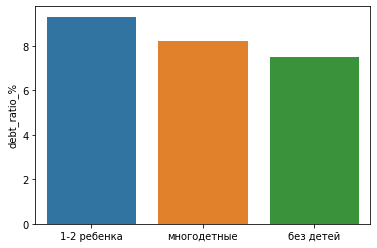

In [29]:
def answer(df_):
    df_['debt_ratio_%'] = (df_['debt'] * 100).round(1)
    df_ = df_.drop(['debt'], axis=1).sort_values(by='debt_ratio_%', ascending=False)
    return df_

df_children = df_for_answers.pivot_table(index='children_group', values='debt') #формирование сводной таблицы
df_children = answer(df_children)
display(df_children)

childrens_group = ['1-2 ребенка', 'многодетные', 'без детей'] 
sns.barplot(x=childrens_group, y=df_children['debt_ratio_%']) #дополнительная визуализация результатов столбцовой гистограммой
plt.show()


**Вывод**

Самая высокая доля задолжников по возврату кредита среди заемщиков, имеющих 1-2 ребенка, более чем на процент этот показатель ниже в группе многодетных заемщиков и самый низкий риск невозврата кредита в срок среди заемщиков не имеющих детей. Это может быть связано  с тем, что наличие детей накладывает дополнительное финансовое обременение.

Отвечая на вопрос, можно сказать, что отсутствие детей ассоциировано с наиболее низким риском невозврата кредита в срок, по сравнению с наличием детей у заемщика. Однако, многодетные заемщики просрачивают возврат кредита реже, чем имеющие 1-2 детей.

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

,debt_ratio_%
family_status_group,
не состоит в браке,8.5
состоит в браке,8.0


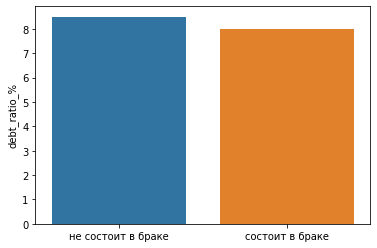

In [30]:
df_family_status_group = df_for_answers.pivot_table(index='family_status_group', values='debt')
df_family_status_group = answer(df_family_status_group)
display(df_family_status_group)
family_status_group = ['не состоит в браке', 'состоит в браке']
sns.barplot(x=family_status_group, y=df_family_status_group['debt_ratio_%'])
plt.show()


Как говорилось ранее, учитывая возможные финансовые особенности, связанные с различным семейным статусом, представляется целесообразным оценка доли должников по каждому из типов семейного статуса, представленных в датафрейме изначально.

,debt_ratio_%
family_status,
Не женат / не замужем,9.8
гражданский брак,9.3
женат / замужем,7.6
в разводе,7.1
вдовец / вдова,6.6


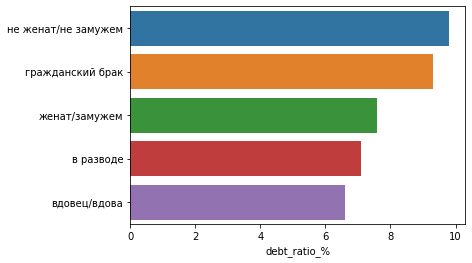

In [31]:
df_family_status = df_for_answers.pivot_table(index='family_status', values='debt')
df_family_status = answer(df_family_status)
display(df_family_status)

family_status_group1 = ['не женат/не замужем', 'гражданский брак', 'женат/замужем', 'в разводе', 'вдовец/вдова']
sns.barplot(x=df_family_status['debt_ratio_%'], y=family_status_group1)
plt.show()

**Вывод**

Риск невозврата кредита в срок несколько выше (0,5%) среди заемщиков, которые на момент взятия кредита не состоят в браке.

При анализе доли должников в группах по семейному статусу, которые были изначально выделены в датафрейме выявлено, что наибольшей риск просрочки платежей по кредиту наблюдается среди не женатых/ не замужних заемщиков, а также среди заемщиков,  состоящих в гражданском браке. Ниже доля должников среди заемщиков, сотоящих в официальном браке, или находящихся в разводе. Самый низкий риск просрочки платежей в группе овдовевших.

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,debt_ratio_%
total_income_group,
средний доход,8.7
высокий доход,8.0
сверхвысокий доход,7.1
низкий доход,6.9


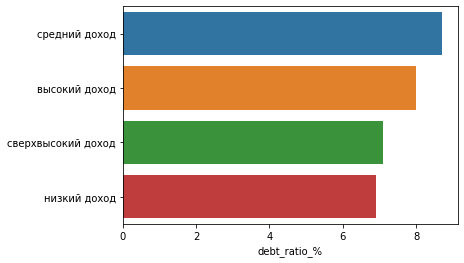

In [32]:
df_income = df_for_answers.pivot_table(index='total_income_group', values='debt')
df_income = answer(df_income)
display(df_income)

income_group = ['средний доход', 'высокий доход', 'сверхвысокий доход', 'низкий доход']
sns.barplot(x=df_income['debt_ratio_%'], y=income_group)
plt.show()

**Вывод**

Возврат кредита срок зависит от уровня дохода. Однако, зависимость эта весьма отличается от ожидаемой интуитивно (сложнее всего выплачивать кредит заемщикам с низким доходом, а проще, соответственно, с высоким). Так наибольшая доля должников выявлена среди заемщиков со средним доходом, а наименьшая среди заемщиков с низким доходом. Это может быть связано, например, с суммой кредитов: возможно люди с низкими доходами берут более мелкие кредиты и тщательнее просчитывают возможность его вернуть, а лица с более высокими доходами кредитуются с большими суммами и расчитывая на свой доход принимают на себя более высокие финансовые риски.  

### Как разные цели кредита влияют на его возврат в срок?

,debt_ratio_%
purpose_group,
автомобиль,9.3
образование,9.3
свадьба,7.9
недвижимость,7.3


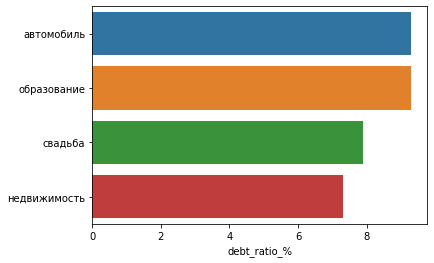

In [33]:
df_purpose = df_for_answers.pivot_table(index='purpose_group', values='debt')
df_purpose = answer(df_purpose)
display(df_purpose)

purpose_group = ['автомобиль', 'образование', 'свадьба', 'недвижимость']
sns.barplot(x=df_purpose['debt_ratio_%'], y=purpose_group)
plt.show()

**Вывод**

Наименее рискованными в плане просрочки платежей являются кредиты на недвижимость, выше риски у кредитов на свадьбу, и наиболее высокие доли должников среди тех кто берет кредиты на образование и на покупку автомобиля. 

## Общий вывод

В исследовании показано, что доля должников среди заемщиков отличается в группах сформированных по количеству детей, семейному положению, уровню дохода и целям кредита. Отличия в доле должников в разных группах составляют не более 1-2%, но когда речь идет о большом количестве заемщиков и больших суммах кредитов за каждым таким процентом могут стоять внушительные суммы невыплаченных задолжностей, наверное (честно говоря не очень силен в банковском деле). Также следует учесть, что в исследовании не проводилась оценка статитстической значимости различий в группах, а значит разница в доли должников может быть и совершенно случайной, особенно это актуально для групп с относительно небольшим количеством наблюдений.

Резюмируя исследование, портрет идеального заемщика - это бездетный/бездетная вдова/вдовец с низким доходом, кредит которому/которой нужен для покупки недвижимости.  